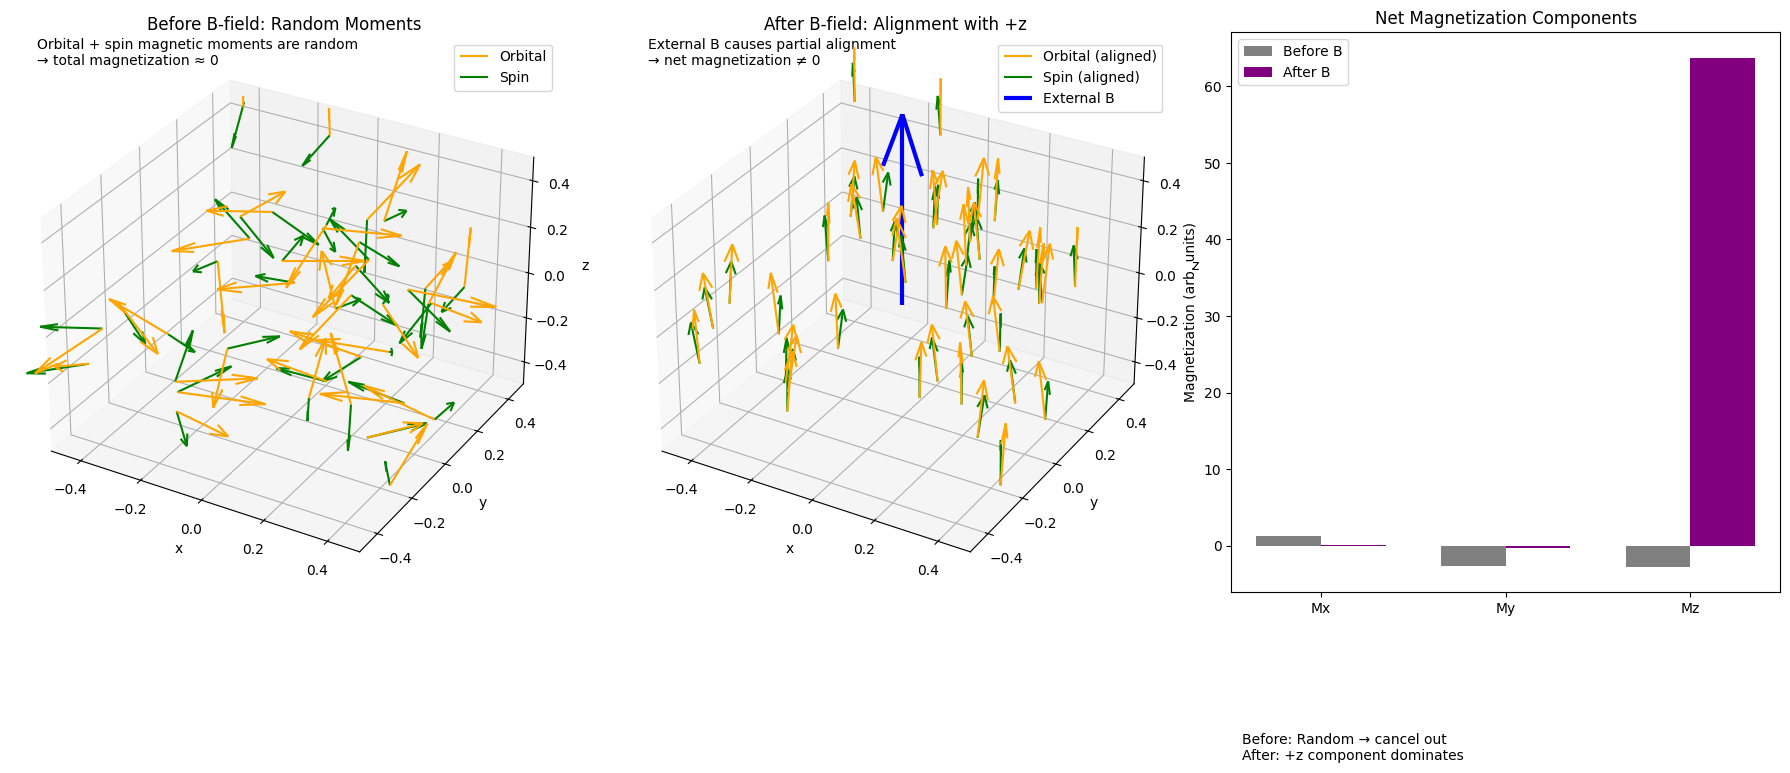


------------------------------------------------------------
RESULT SUMMARY
Initial magnetization vector M = [ 1.20130785 -2.65863728 -2.74788612],  |M| = 4.008
Final   magnetization vector M = [ 0.12200684 -0.28722037 63.7643409 ],    |M| = 63.765
------------------------------------------------------------
Notes:
 - Orbital magnetic moments arise from electron motion around nuclei.
 - Spin magnetic moments come from electron intrinsic spin.
 - Initially random → total M ≈ 0 (unmagnetized).
 - Under external B, moments align → M ≠ 0 (magnetized).


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


N = 40
cube_size = 1.0
m_orbit_mag = 1.0
m_spin_mag = 0.6
volume = cube_size**3


B_vec = np.array([0, 0, 1])
B_vec = B_vec / np.linalg.norm(B_vec)
alignment_factor = 0.9


def random_unit_vectors(n):
    phi = np.random.uniform(0, 2*np.pi, n)
    costheta = np.random.uniform(-1, 1, n)
    theta = np.arccos(costheta)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    return np.vstack((x,y,z)).T

positions = np.random.uniform(-cube_size/2, cube_size/2, (N,3))
orient_orbit = random_unit_vectors(N)
orient_spin  = random_unit_vectors(N)

m_orbit_initial = orient_orbit * m_orbit_mag
m_spin_initial  = orient_spin  * m_spin_mag
m_total_initial = m_orbit_initial + m_spin_initial

def align_toward(vectors, target, alpha):
    """Rotate vectors toward target direction by fraction alpha."""
    aligned = []
    for v in vectors:
        mag = np.linalg.norm(v)
        if mag < 1e-12:
            aligned.append(v)
            continue
        unit_v = v / mag
        new_dir = (1-alpha)*unit_v + alpha*target
        new_dir /= np.linalg.norm(new_dir)
        aligned.append(new_dir * mag)
    return np.array(aligned)


m_orbit_aligned = align_toward(m_orbit_initial, B_vec, alignment_factor)
m_spin_aligned  = align_toward(m_spin_initial,  B_vec, alignment_factor)
m_total_aligned = m_orbit_aligned + m_spin_aligned


M_initial = np.sum(m_total_initial, axis=0) / volume
M_final   = np.sum(m_total_aligned, axis=0) / volume


fig = plt.figure(figsize=(18,8))


ax1 = fig.add_subplot(131, projection='3d')
ax1.quiver(positions[:,0], positions[:,1], positions[:,2],
           m_orbit_initial[:,0], m_orbit_initial[:,1], m_orbit_initial[:,2],
           color='orange', length=0.25, normalize=True, label='Orbital')
ax1.quiver(positions[:,0], positions[:,1], positions[:,2],
           m_spin_initial[:,0], m_spin_initial[:,1], m_spin_initial[:,2],
           color='green', length=0.18, normalize=True, label='Spin')
ax1.set_title("Before B-field: Random Moments", fontsize=12)
ax1.text2D(0.05, 0.95,
           "Orbital + spin magnetic moments are random\n→ total magnetization ≈ 0",
           transform=ax1.transAxes, fontsize=10)
ax1.legend()
ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('z')
ax1.set_xlim(-0.5,0.5); ax1.set_ylim(-0.5,0.5); ax1.set_zlim(-0.5,0.5)


ax2 = fig.add_subplot(132, projection='3d')
ax2.quiver(positions[:,0], positions[:,1], positions[:,2],
           m_orbit_aligned[:,0], m_orbit_aligned[:,1], m_orbit_aligned[:,2],
           color='orange', length=0.25, normalize=True, label='Orbital (aligned)')
ax2.quiver(positions[:,0], positions[:,1], positions[:,2],
           m_spin_aligned[:,0], m_spin_aligned[:,1], m_spin_aligned[:,2],
           color='green', length=0.18, normalize=True, label='Spin (aligned)')
ax2.quiver(0,0,0, B_vec[0],B_vec[1],B_vec[2], length=0.8, color='blue', linewidth=3, label='External B')
ax2.set_title("After B-field: Alignment with +z", fontsize=12)
ax2.text2D(0.05, 0.95,
           "External B causes partial alignment\n→ net magnetization ≠ 0",
           transform=ax2.transAxes, fontsize=10)
ax2.legend()
ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('z')
ax2.set_xlim(-0.5,0.5); ax2.set_ylim(-0.5,0.5); ax2.set_zlim(-0.5,0.5)


ax3 = fig.add_subplot(133)
labels = ['Mx','My','Mz']
x = np.arange(len(labels))
width = 0.35
ax3.bar(x - width/2, M_initial, width, color='gray', label='Before B')
ax3.bar(x + width/2, M_final, width, color='purple', label='After B')
ax3.set_xticks(x); ax3.set_xticklabels(labels)
ax3.set_ylabel('Magnetization (arb. units)')
ax3.set_title('Net Magnetization Components')
ax3.legend()
ax3.text(0.02, -0.3,
         "Before: Random → cancel out\nAfter: +z component dominates",
         transform=ax3.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "-"*60)
print("RESULT SUMMARY")
print(f"Initial magnetization vector M = {M_initial},  |M| = {np.linalg.norm(M_initial):.3f}")
print(f"Final   magnetization vector M = {M_final},    |M| = {np.linalg.norm(M_final):.3f}")
print("-"*60)
print("Notes:")
print(" - Orbital magnetic moments arise from electron motion around nuclei.")
print(" - Spin magnetic moments come from electron intrinsic spin.")
print(" - Initially random → total M ≈ 0 (unmagnetized).")
print(" - Under external B, moments align → M ≠ 0 (magnetized).")
